<a href="https://colab.research.google.com/github/RodrigoMarenda/Analise_de_Dados/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Rodrigo Belo Marenda

**Matrícula:** 4052024002404

**Dataset:** [Wine Quality](https://www.kaggle.com/datasets/sahideseker/wine-quality-classification)


<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">Classificação da Qualidade de Vinhos</p>


[**Classificação da Qualidade de Vinhos**]

(https://github.com/RodrigoMarenda/Analise_de_Dados/blob/main/wine_image.jpeg)

(https://github.com/RodrigoMarenda/Sports_Predictions/blob/main/Imagens/wine_image.jpeg?raw=true)


# **Introdução**

### **Definição do Problema:**

O conjunto de dados Wine Quality é um conjunto de dados multivariado que consiste na avaliação de vinhos produzidos mundialmente. O objetivo principal é classificar o Rotuno do Vinho com com base em quatro características : acidez, residuo de açucar,	nivel alcolico	e densidade.


**Tipo de Problema**

**classificação supervisionada**  (Baixa, Média ou Alta Qualidade).


  - **Premissa**: Dados históricos dos jogos disputados, com variaveis que possam ser correlacionadas para determinar uma tendencia de resultado.

  - **Hipótese**: Um modelo de machine learning treinado com dados históricos, para identificar padrões que ajudem a prever o resultado das partidas.

  - **Variáveis**:

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?

- Existe uma correlação entre nacidez e nivel alcolico ?

- A espécie Iris setosa é mais facilmente separável das outras duas espécies?

## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características (comprimento e largura da sépala, comprimento e largura da pétala), o objetivo é prever a qual das três classes (espécies de Íris) uma determinada flor pertence.

## Seleção de Dados

O dataset Iris é um conjunto de dados amplamente disponível e frequentemente incluído em bibliotecas de aprendizado de máquina, como *scikit-learn* no Python. Não é necessária uma etapa de seleção de dados externa, pois o dataset já está curado e pronto para uso.

## Atributos do Dataset

O dataset Iris contém 150 amostras, com 50 amostras de cada uma das três espécies de Íris. Possui cinco atributos:

- ***sepal length*** (comprimento da sépala em cm)
- ***sepal width*** (largura da sépala em cm)
- ***petal length*** (comprimento da pétala em cm)
- ***petal width*** (largura da pétala em cm)
- ***species*** (espécie de Íris: setosa, versicolor, virginica)

******************************************

## **Estrutura do projeto:**

[**1. Importação das Bibliotecas:**](#1)

[**2. Carga dos Dados:**](#2)

[**3. Pré-processamento de dados:**](#3)

[**4. Transformação e Engenharia de Atributos:**](#4)

[**5. Análise Exploratória de Dados (EDA - Exploratory Data Analysis):**](#5)

[**6. Interpretação e Geração de Insights:**](#6)

[**7. Visualização Final e Comunicação:**](#7)

[**8. Conclusão:**](#8)

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">1. Importação das Bibliotecas</p>

# Step 01: Importação das Bibliotecas

Nessa etapa estamos importanto todas as blibliotecas que serão utilizadas nesse algoritimo

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">2. Carga dos Dados</p>

# Step 01: Carga de Dados

Nessa etapa estamos realizando a carga dos dados, que estão armazendos em um arquivo do tipo csv (Comma-Separated Values). Esse dataset foi obtido no Site xxxx. Foram coletados dados de rotulos de vinhos, com o objetivo de realição a classificação dos Rotulos de acordo com as sua variaveis dipostas no dataset.

In [59]:
#--------------------------------------------------------#
# Informa a URL de importação do dataset                 #
#--------------------------------------------------------#

url ="https://raw.githubusercontent.com/RodrigoMarenda/Sports_Predictions/refs/heads/main/data/winemag-data_first25k.csv"


# Lê o arquivo
df = pd.read_csv(url, delimiter=';', low_memory=False)


# Exibir as primeiras linhas do DataFrame
df.head()



In [60]:
# Verifica o tamanho do dataset , total de linhas e colunas.
df.shape
print(f"O Dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.")

O Dataset tem 150931 linhas e 16 colunas.


In [61]:
# Verifica a estrutura do dataset, datatypes das colunas
df.dtypes

,0
id,float64
country,object
description,object
designation,object
points,float64
price,float64
province,object
region_1,object
region_2,object
variety,object


<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">3. Pré-processamento de dados:</p>

Nessa etapa será realizado o ajuste do dataset, para considerar somente as colunas que fazem sentido para a analise. Também será feita a limpeza, transformação e o tratamento de dados nulos ou vazios. Faremos a padronização dos dados para melhorar o desempenho do algoritmo.

# Step 01: Exploração Inicial

In [62]:
print("Informações gerais:")
print(df.info())

print("\nResumo estatístico:")
print(df.describe())

print("\nValores nulos por coluna:")
print(df.isnull().sum())

print("\nAmostra dos dados:")
print(df.head())


Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150931 entries, 0 to 150930
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              25001 non-null  float64
 1   country         24999 non-null  object 
 2   description     25001 non-null  object 
 3   designation     17179 non-null  object 
 4   points          24279 non-null  float64
 5   price           22188 non-null  float64
 6   province        24277 non-null  object 
 7   region_1        20509 non-null  object 
 8   region_2        9411 non-null   object 
 9   variety         24279 non-null  object 
 10  winery          24279 non-null  object 
 11  fixed_acidity   25001 non-null  float64
 12  residual_sugar  25001 non-null  float64
 13  alcohol         25001 non-null  float64
 14  density         25001 non-null  float64
 15  quality_label   25001 non-null  object 
dtypes: float64(7), object(9)
memory usage: 18.4+ MB
None



# Step 02: Total e Tipo das Instâncias

O dataset Iris possui 150 instâncias (observações), com 50 instâncias para cada uma das três espécies. As quatro características de medição são de tipo numérico (float), enquanto o atributo 'species' é categórico.

In [75]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 23964

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
Index: 23964 entries, 25 to 25000
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     23964 non-null  float64
 1   country                23964 non-null  object 
 2   description            23964 non-null  object 
 3   designation            23964 non-null  object 
 4   points                 23964 non-null  float64
 5   price                  23964 non-null  int64  
 6   province               23964 non-null  object 
 7   region_1               23964 non-null  object 
 8   region_2               23964 non-null  object 
 9   variety                23964 non-null  object 
 10  winery                 23964 non-null  object 
 11  fixed_acidity          23964 non-null  float64
 12  residual_sugar         23964 non-null  float64
 13  alcohol                23964 non-null  float64
 14  den

#Step 03: Limpeza dos Dados


In [64]:
#Tratamento de valores ausentes:

## Remover duplicatas
df.drop_duplicates(inplace=True)


In [52]:

print("Linhas com pelo menos um valor nulo:")
print(df[df.isnull().any(axis=1)])


## Remover linhas com nulos condicionadas ao id
df = df[~((df['id'].notna()) & (df.isnull().any(axis=1)))]
df.dropna(how='any', inplace=True)



Linhas com pelo menos um valor nulo:
            id    country                                        description  \
1          1.0      Spain  Ripe aromas of fig, blackberry and cassis are ...   
4          4.0     France  This is the top wine from La Bégude, named aft...   
5          5.0      Spain  Deep, dense and pure from the opening bell, th...   
6          6.0      Spain  Slightly gritty black-fruit aromas include a s...   
7          7.0      Spain  Lush cedary black-fruit aromas are luxe and of...   
...        ...        ...                                                ...   
24995  24995.0   Portugal  A big textured, smooth wine, sweet fruits with...   
24996  24996.0      Spain  Starts out rustic and leathery, with hints of ...   
24997  24997.0      Spain  A delicious wine and very much the model for v...   
25000  25000.0  Australia  This coppery-pink rosé shows the same classy t...   
25001      NaN        NaN                                                NaN   

  

<ipython-input-52-281774589>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(how='any', inplace=True)


In [66]:
print("Linhas com pelo menos um valor nulo:")
print(df[df.isnull().any(axis=1)])

Linhas com pelo menos um valor nulo:
            id    country                                        description  \
1          1.0      Spain  Ripe aromas of fig, blackberry and cassis are ...   
4          4.0     France  This is the top wine from La Bégude, named aft...   
5          5.0      Spain  Deep, dense and pure from the opening bell, th...   
6          6.0      Spain  Slightly gritty black-fruit aromas include a s...   
7          7.0      Spain  Lush cedary black-fruit aromas are luxe and of...   
...        ...        ...                                                ...   
24995  24995.0   Portugal  A big textured, smooth wine, sweet fruits with...   
24996  24996.0      Spain  Starts out rustic and leathery, with hints of ...   
24997  24997.0      Spain  A delicious wine and very much the model for v...   
25000  25000.0  Australia  This coppery-pink rosé shows the same classy t...   
25001      NaN        NaN                                                NaN   

  

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">4. Transformação e Engenharia de Atributos:</p>

#Step 01: Conversão de Valores

In [84]:
# Conversão de colunas numéricas que estão como objeto
numeric_object_cols = ['fixed_acidity', 'residual_sugar', 'alcohol', 'density']

# Substitui vírgula por ponto e converte para float
for col in numeric_object_cols:
    df[col] = df[col].astype(str).str.replace(',', '.').str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')


print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 23964 entries, 25 to 25000
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     23964 non-null  float64
 1   country                23964 non-null  object 
 2   description            23964 non-null  object 
 3   designation            23964 non-null  object 
 4   points                 23964 non-null  float64
 5   price                  23964 non-null  int64  
 6   province               23964 non-null  object 
 7   region_1               23964 non-null  object 
 8   region_2               23964 non-null  object 
 9   variety                23964 non-null  object 
 10  winery                 23964 non-null  object 
 11  fixed_acidity          23964 non-null  float64
 12  residual_sugar         23964 non-null  float64
 13  alcohol                23964 non-null  float64
 14  density                23964 non-null  float64
 15  qualit

#Step 01: Tratamento de Valores Nulos

In [83]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset:")
df.isnull().sum()

Valores nulos no dataset:


,0
id,0
country,0
description,0
designation,0
points,0
price,0
province,0
region_1,0
region_2,0
variety,0


In [85]:
#codigo aqui

#Categóricas
df['designation'].fillna('Sem Designação', inplace=True)
df['country'].fillna('Desconhecido', inplace=True)
df['province'].fillna('Desconhecido', inplace=True)
df['region_1'].fillna('Não Informada', inplace=True)
df['region_2'].fillna('Não Informada', inplace=True)  # ou df.drop('region_2', axis=1)
df['variety'].fillna('Outra', inplace=True)
df['winery'].fillna('Desconhecida', inplace=True)

# Numéricas
df['points'].fillna(df['points'].median(), inplace=True)
df['price'] = 0


#Step 02: Tratamento de Outliers

In [78]:
df['density'] = pd.to_numeric(df['density'], errors='coerce')

#, 'density'

# Tratamento de Outliers
numeric_cols = ['points', 'price', 'fixed_acidity', 'residual_sugar', 'alcohol']
outliers_df = pd.DataFrame()
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outliers_df = pd.concat([outliers_df, outliers])
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Mostrar exemplos de outliers descartados
print("Exemplos de linhas removidas por outliers:")
print(outliers_df.drop_duplicates().head())




Exemplos de linhas removidas por outliers:
Empty DataFrame
Columns: [id, country, description, designation, points, price, province, region_1, region_2, variety, winery, fixed_acidity, residual_sugar, alcohol, density, quality_label, price_range, qpr, full_region, desc_length, alcohol_density_ratio]
Index: []

[0 rows x 21 columns]


In [77]:
# Verifica o tamanho do dataset , total de linhas e colunas.
df.shape
print(f"O Dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.")

O Dataset tem 23964 linhas e 21 colunas.


#Step 03: Categorização de Variáveis

In [ ]:
#codigo aqui

# Step 04: Novas Caracteristicas

In [72]:
#novas características

def faixa_preco(preco):
    if preco == 0:
        return 'Sem Preço'
    elif preco > 0 and preco <= 30:
        return 'baixo'
    elif preco <= 60:
        return 'médio'
    else:
        return 'alto'

df['price_range'] = df['price'].apply(faixa_preco)
df['qpr'] = df['points'] / df['price']
df['full_region'] = df['province'] + ' - ' + df['region_1']
df['desc_length'] = df['description'].str.len()
df['alcohol_density_ratio'] = df['alcohol'] / df['density']

# Step 05: Normalização/Padronização

In [88]:
X = df[numeric_cols].copy()
y = df['quality_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

In [80]:

# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)


NameError: name 'X_train_normalized' is not defined

In [ ]:

print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())

In [ ]:
# Visualização da distribuição após a normalização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala (Normalizado)')
plt.xlabel('Comprimento da Sépala Normalizado')
plt.ylabel('Frequência')
plt.show()

#padronização


In [ ]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train)
X_train_standardized = scaler_std.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_test)


# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


# Visualização da distribuição após a padronização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala (Padronizado)')
plt.xlabel('Comprimento da Sépala Padronizado')
plt.ylabel('Frequência')
plt.show()


# Step 06: Redução de Dimensionalidade

In [81]:
#codigo aqui

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecionar apenas colunas numéricas válidas
X_numeric = df[features].copy()

# Normalizar os dados antes do PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


# Aplicar PCA para reduzir para 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Substituir as features originais pelas componentes principais
X = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])


plt.figure(figsize=(8,6))
plt.scatter(X['PC1'], X['PC2'], c=pd.Categorical(df['quality_label']).codes, cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Distribuição dos dados após PCA')
plt.colorbar()
plt.show()

NameError: name 'features' is not defined

# Step 07: Divisão do Conjunto de Dados

In [89]:
# Seleção de variáveis
features = ['alcohol', 'density', 'fixed_acidity', 'price']
X = df[features]
y = df['quality_label']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliação
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        high       1.00      1.00      1.00      1677
         low       1.00      1.00      1.00      1420
      medium       1.00      1.00      1.00      1696

    accuracy                           1.00      4793
   macro avg       1.00      1.00      1.00      4793
weighted avg       1.00      1.00      1.00      4793



<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">5. Transformação e Engenharia de Atributos:</p>

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [ ]:
# Separar features (X) e target (y)
X = df.drop('species', axis=1)
y = df['species']

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (105, 4)
Dimensões de X_test: (45, 4)
Dimensões de y_train: (105,)
Dimensões de y_test: (45,)


O histograma de *sepal length* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

O histograma de *sepal length* após a padronização mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.

In [ ]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Iris:")
df.isnull().sum()

Valores nulos no dataset Iris:


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


## Outras Transformações e Etapas de Pré-Processamento

Outras etapas de pré-processamento incluem a seleção de características, redução de dimensionalidade (como PCA) ou criação de novas características (feature engineering). O que você faria a mais?



#

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">5. Análise Exploratória de Dados (EDA - Exploratory Data Analysis)</p>

Objetivo: entender padrões, distribuições, correlações e possíveis insights.

Visualizações com histogramas, boxplots, heatmaps, pairplots, etc.

Estatísticas descritivas (média, mediana, desvio padrão).

Identificação de relações entre variáveis (ex: correlação de Pearson).

Análise de tendências e sazonalidades (se houver data/hora).

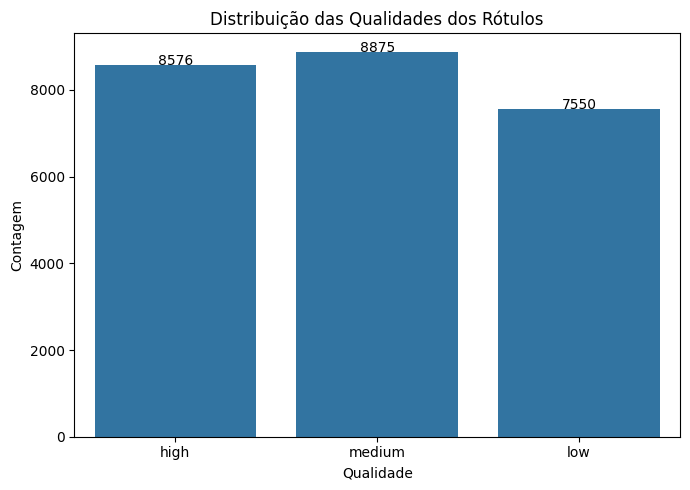

In [ ]:
#--------------------------------------------------------#
# Mostra Grafico com a Distribuição das Classes          #
#--------------------------------------------------------#
plt.figure(figsize=(7, 5))

# Captura o objeto Axes
ax = sns.countplot(x='quality_label', data=df)

plt.title('Distribuição das Qualidades dos Rótulos')
plt.xlabel('Qualidade')
plt.ylabel('Contagem')

# Mostra os valores nas barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height),
            ha="center", fontsize=10)

#Plota o grafico
plt.tight_layout()
plt.show()

#matriz de correlação

In [ ]:
# Matriz de correlação
print("\nMatriz de Correlação:")
df.iloc[:, :4].corr()

plt.figure(figsize=(8, 6))
# mapa de calor das variáveis numéricas
sns.heatmap(df.iloc[:, :4].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Características Numéricas do Iris Dataset')
plt.show()


In [ ]:
# Estatísticas descritivas agrupadas por espécie
df.groupby('species').describe()

# Boxplot do comprimento da pétala por espécie
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal width (cm)', data=df)
plt.title('Largura da Pétala por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Largura da Pétala (cm)')
plt.show()

# Boxplot do comprimento da pétala por espécie
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal length (cm)', data=df)
plt.title('Comprimento da Pétala por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Comprimento da Pétala (cm)')
plt.show()




Histograma
A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

Média
A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

Desvio padrão

qual o grafico seria interresante poara mostra isso


<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">6. Interpretação e Geração de Insights: xxxxx:</p>

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">7. Visualização Final e Comunicação</p>

******************************************

Quais variáveis se destacam entre os rótulos?

Existe algum grupo de qualidade com comportamento muito diferente?

Alguma recomendação com base nas descobertas?

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">8. Conclusão</p>

A análise e pré-processamento do dataset Iris demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset é limpo e balanceado, com características numéricas bem definidas que permitem uma clara separação entre as espécies, especialmente a Iris setosa. A análise exploratória revelou correlações importantes entre as características e a eficácia de visualizações como boxplots para distinguir as classes. As etapas de normalização e padronização são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram validadas:

1.   *As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?* Sim, dado as análises que fizemos no boxplot, observamos um comportamento muito claro e distinto.

2.   *Existe uma correlação entre comprimento da pétala e largura da pétala?* Existe forte correlação entre os atributos *petal length* e *petal width*.

3.   *A espécie Iris setosa é mais facilmente separável das outras duas espécies?* Sim, devido às suas características distintas de menor comprimento e largura da pétala.